Made with help of chatgpt and github copilot by feeding question subparts as prompt

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import wandb  # Log experiments

# Initialize Weights & Biases


# Load dataset
train_labels = torch.load("Q1/train_labels.pt")  # Shape: (N,)
test_labels = torch.load("Q1/test_labels.pt")


# Convert dataset to float and normalize
train_data = torch.load("Q1/train_data.pt").float() / 255.0  # Normalize to [0,1]
test_data = torch.load("Q1/test_data.pt").float() / 255.0

# Create TensorDataset
train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"✅ Dataset Loaded: {len(train_dataset)} train samples, {len(test_dataset)} test samples")

--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\logging\__init__.py", line 1113, in emit
    stream.write(msg + self.terminator)
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode characters in position 139-140: character maps to <undefined>
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\SHARS\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\SHARS\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\SHARS\AppD

✅ Dataset Loaded: 50000 train samples, 10000 test samples


In [8]:
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10):
    model.to(device)
    best_acc = 0

    for epoch in range(num_epochs):
        model.train()
        total_loss, correct, total = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

        train_acc = 100 * correct / total
        test_acc = evaluate_model(model, test_loader)

        wandb.log({"Train Loss": total_loss / len(train_loader), "Train Acc": train_acc, "Test Acc": test_acc})

        print(f"Epoch {epoch+1}: Train Loss = {total_loss / len(train_loader):.4f}, Train Acc = {train_acc:.2f}%, Test Acc = {test_acc:.2f}%")

        # Save best model
        if test_acc > best_acc:
            best_acc = test_acc
            torch.save(model.state_dict(), "best_model.pth")

    print("✅ Training Complete!")

def evaluate_model(model, loader):
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

    return 100 * correct / total


In [10]:
num_classes = len(torch.unique(train_labels))  # Dynamically count classes

print(f"✅ Number of Classes: {num_classes}")

✅ Number of Classes: 10


In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
wandb.init(project="ResNet18_Baseline")
# Load ResNet18 (From Scratch)
model_scratch = models.resnet18()
model_scratch.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)  # Adjust for 36x36
model_scratch.maxpool = nn.Identity()  # Remove maxpool (not needed for small images)
model_scratch.fc = nn.Linear(model_scratch.fc.in_features, 10)  # Modify last layer for 10 classes

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_scratch.parameters(), lr=0.001)

print("🚀 Training ResNet18 from Scratch...")
train_model(model_scratch, train_loader, test_loader, criterion, optimizer)

wandb.finish()

--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\logging\__init__.py", line 1113, in emit
    stream.write(msg + self.terminator)
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode characters in position 139-140: character maps to <undefined>
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\SHARS\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\SHARS\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\SHARS\AppD

🚀 Training ResNet18 from Scratch...
Epoch 1: Train Loss = 1.2576, Train Acc = 53.99%, Test Acc = 63.10%
Epoch 2: Train Loss = 0.7578, Train Acc = 73.42%, Test Acc = 70.58%
Epoch 3: Train Loss = 0.5665, Train Acc = 80.25%, Test Acc = 79.55%
Epoch 4: Train Loss = 0.4412, Train Acc = 84.71%, Test Acc = 80.35%
Epoch 5: Train Loss = 0.3429, Train Acc = 88.00%, Test Acc = 77.38%
Epoch 6: Train Loss = 0.2578, Train Acc = 90.94%, Test Acc = 81.37%
Epoch 7: Train Loss = 0.1904, Train Acc = 93.27%, Test Acc = 82.43%
Epoch 8: Train Loss = 0.1339, Train Acc = 95.21%, Test Acc = 81.53%
Epoch 9: Train Loss = 0.1036, Train Acc = 96.29%, Test Acc = 82.59%
Epoch 10: Train Loss = 0.0880, Train Acc = 96.95%, Test Acc = 82.67%
✅ Training Complete!


Test Acc,▁▄▇▇▆█████
Train Acc,▁▄▅▆▇▇▇███
Train Loss,█▅▄▃▃▂▂▁▁▁
Test Acc,82.67
Train Acc,96.952
Train Loss,0.08796


In [16]:
# Load Pretrained ResNet18
model_pretrained = models.resnet18(pretrained=True)
model_pretrained.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)  # Adjust for 36x36
model_pretrained.maxpool = nn.Identity()  # Remove maxpool
model_pretrained.fc = nn.Linear(model_pretrained.fc.in_features, num_classes)  # Use dynamic class count

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_pretrained.parameters(), lr=0.001)

# ✅ Initialize WandB with a unique name
wandb.init(project="ResNet18_Baseline", name="ResNet18_Pretrained")

print("🚀 Training Pretrained ResNet18...")
train_model(model_pretrained, train_loader, test_loader, criterion, optimizer)

wandb.finish()

c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\logging\__init__.py", line 1113, in emit
    stream.write(msg + self.terminator)
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\encodings\cp1252.py", line 19, in encod

🚀 Training Pretrained ResNet18...
Epoch 1: Train Loss = 0.8051, Train Acc = 72.07%, Test Acc = 79.13%
Epoch 2: Train Loss = 0.4497, Train Acc = 84.58%, Test Acc = 84.91%
Epoch 3: Train Loss = 0.3083, Train Acc = 89.36%, Test Acc = 86.33%
Epoch 4: Train Loss = 0.2185, Train Acc = 92.45%, Test Acc = 86.35%
Epoch 5: Train Loss = 0.1603, Train Acc = 94.40%, Test Acc = 86.54%
Epoch 6: Train Loss = 0.1200, Train Acc = 95.85%, Test Acc = 86.59%
Epoch 7: Train Loss = 0.0941, Train Acc = 96.77%, Test Acc = 86.96%
Epoch 8: Train Loss = 0.0794, Train Acc = 97.19%, Test Acc = 87.90%
Epoch 9: Train Loss = 0.0691, Train Acc = 97.64%, Test Acc = 86.84%
Epoch 10: Train Loss = 0.0661, Train Acc = 97.77%, Test Acc = 88.22%
✅ Training Complete!


Test Acc,▁▅▇▇▇▇▇█▇█
Train Acc,▁▄▆▇▇▇████
Train Loss,█▅▃▂▂▂▁▁▁▁
Test Acc,88.22
Train Acc,97.77
Train Loss,0.06614


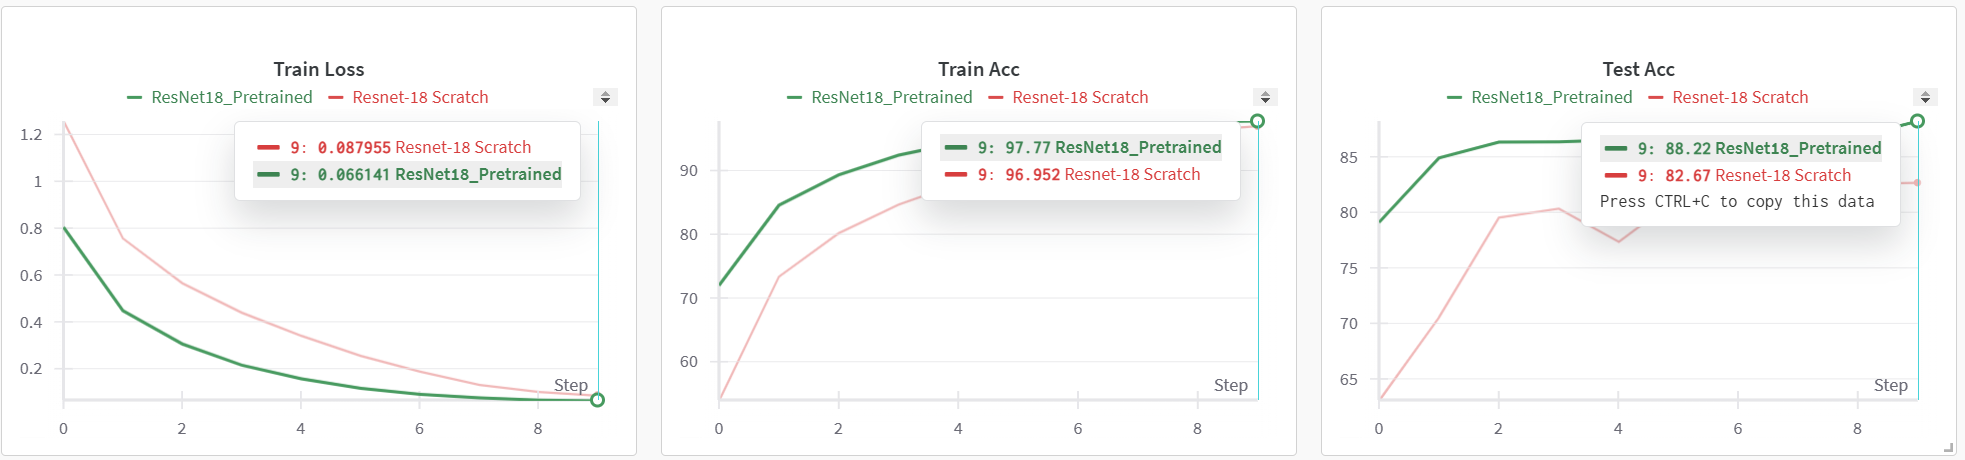

This concludes 1.1 (Baseline training)

In [17]:
def register_hooks(model, input_size=(1, 3, 36, 36)):
    shapes = {}

    def hook(module, input, output, name):
        shapes[name] = output.shape  # Store output shape

    # Register hooks for all layers
    hooks = []
    for name, layer in model.named_children():
        hooks.append(layer.register_forward_hook(lambda mod, inp, out, n=name: hook(mod, inp, out, n)))

    # Pass a dummy image through the model
    dummy_input = torch.randn(input_size).to(device)
    with torch.no_grad():
        model(dummy_input)

    # Remove hooks
    for h in hooks:
        h.remove()

    return shapes

# Run on ResNet18
shapes = register_hooks(model_scratch)  # Run on the model trained from scratch

# Print the spatial dimensions
for layer, shape in shapes.items():
    print(f"{layer}: {shape}")

conv1: torch.Size([1, 64, 36, 36])
bn1: torch.Size([1, 64, 36, 36])
relu: torch.Size([1, 64, 36, 36])
maxpool: torch.Size([1, 64, 36, 36])
layer1: torch.Size([1, 64, 36, 36])
layer2: torch.Size([1, 128, 18, 18])
layer3: torch.Size([1, 256, 9, 9])
layer4: torch.Size([1, 512, 5, 5])
avgpool: torch.Size([1, 512, 1, 1])
fc: torch.Size([1, 10])


the required sizes asked in the question 

In [18]:
print("✅ Final Accuracy:")
print(f"ResNet18 from Scratch: {evaluate_model(model_scratch, test_loader):.2f}%")
print(f"Pretrained ResNet18: {evaluate_model(model_pretrained, test_loader):.2f}%")

✅ Final Accuracy:
ResNet18 from Scratch: 82.67%
Pretrained ResNet18: 88.22%


In [22]:
from torch.utils.data import Dataset
import torchvision.transforms as transforms
# Custom dataset to resize images on-the-fly
class ResizedDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]  # Already a tensor
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image.unsqueeze(0))  # Add batch dimension before resizing
            image = image.squeeze(0)  # Remove extra dimension after resize

        return image, label

# Define transformation
resize_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize dynamically 
])

# Apply custom dataset class
train_dataset_resized = ResizedDataset(train_data, train_labels, transform=resize_transform)
test_dataset_resized = ResizedDataset(test_data, test_labels, transform=resize_transform)

# Create DataLoaders
train_loader_resized = DataLoader(train_dataset_resized, batch_size=64, shuffle=True)
test_loader_resized = DataLoader(test_dataset_resized, batch_size=64, shuffle=False)

print(f"✅ Resized dataset (on-the-fly): {len(train_dataset_resized)} train samples, {len(test_dataset_resized)} test samples")

✅ Resized dataset (on-the-fly): 50000 train samples, 10000 test samples


In [23]:
# Load ResNet18 from scratch
model_scratch_resized = models.resnet18()
model_scratch_resized.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)  # Standard ResNet18 conv
model_scratch_resized.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)  # Restore maxpool
model_scratch_resized.fc = nn.Linear(model_scratch_resized.fc.in_features, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_scratch_resized.parameters(), lr=0.001)

# ✅ Initialize a new WandB run
wandb.init(project="ResNet18_Resized", name="ResNet18_Scratch_224")

print("🚀 Training ResNet18 from Scratch (224×224)...")
train_model(model_scratch_resized, train_loader_resized, test_loader_resized, criterion, optimizer)
wandb.finish()

--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\logging\__init__.py", line 1113, in emit
    stream.write(msg + self.terminator)
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode characters in position 139-140: character maps to <undefined>
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\SHARS\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\SHARS\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\SHARS\AppD

🚀 Training ResNet18 from Scratch (224×224)...
Epoch 1: Train Loss = 1.3641, Train Acc = 50.50%, Test Acc = 59.59%
Epoch 2: Train Loss = 0.8461, Train Acc = 70.17%, Test Acc = 72.50%
Epoch 3: Train Loss = 0.6437, Train Acc = 77.67%, Test Acc = 77.11%
Epoch 4: Train Loss = 0.5189, Train Acc = 81.94%, Test Acc = 77.62%
Epoch 5: Train Loss = 0.4177, Train Acc = 85.30%, Test Acc = 81.14%
Epoch 6: Train Loss = 0.3274, Train Acc = 88.45%, Test Acc = 80.30%
Epoch 7: Train Loss = 0.2447, Train Acc = 91.44%, Test Acc = 82.97%
Epoch 8: Train Loss = 0.1833, Train Acc = 93.43%, Test Acc = 81.09%
Epoch 9: Train Loss = 0.1268, Train Acc = 95.46%, Test Acc = 82.36%
Epoch 10: Train Loss = 0.0975, Train Acc = 96.58%, Test Acc = 81.38%
✅ Training Complete!


Test Acc,▁▅▆▆▇▇█▇██
Train Acc,▁▄▅▆▆▇▇███
Train Loss,█▅▄▃▃▂▂▁▁▁
Test Acc,81.38
Train Acc,96.576
Train Loss,0.0975


In [24]:
# Load Pretrained ResNet18
model_pretrained_resized = models.resnet18(pretrained=True)
model_pretrained_resized.fc = nn.Linear(model_pretrained_resized.fc.in_features, 10)  # Adjust last layer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_pretrained_resized.parameters(), lr=0.001)

# ✅ Initialize a new WandB run
wandb.init(project="ResNet18_Resized", name="ResNet18_Pretrained_224")

print("🚀 Training Pretrained ResNet18 (224×224)...")
train_model(model_pretrained_resized, train_loader_resized, test_loader_resized, criterion, optimizer)

wandb.finish()

c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\logging\__init__.py", line 1113, in emit
    stream.write(msg + self.terminator)
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\encodings\cp1252.py", line 19, in encod

🚀 Training Pretrained ResNet18 (224×224)...
Epoch 1: Train Loss = 0.5942, Train Acc = 79.80%, Test Acc = 79.67%
Epoch 2: Train Loss = 0.3437, Train Acc = 88.26%, Test Acc = 86.55%
Epoch 3: Train Loss = 0.2381, Train Acc = 91.95%, Test Acc = 88.61%
Epoch 4: Train Loss = 0.1801, Train Acc = 93.75%, Test Acc = 87.86%
Epoch 5: Train Loss = 0.1293, Train Acc = 95.40%, Test Acc = 89.22%
Epoch 6: Train Loss = 0.1046, Train Acc = 96.44%, Test Acc = 88.52%
Epoch 7: Train Loss = 0.0850, Train Acc = 97.06%, Test Acc = 88.26%
Epoch 8: Train Loss = 0.0744, Train Acc = 97.45%, Test Acc = 90.61%
Epoch 9: Train Loss = 0.0578, Train Acc = 98.00%, Test Acc = 89.13%
Epoch 10: Train Loss = 0.0562, Train Acc = 98.02%, Test Acc = 89.54%
✅ Training Complete!


Test Acc,▁▅▇▆▇▇▆█▇▇
Train Acc,▁▄▆▆▇▇████
Train Loss,█▅▃▃▂▂▁▁▁▁
Test Acc,89.54
Train Acc,98.018
Train Loss,0.05616


In [25]:
print("✅ Final Accuracy (Resized Dataset):")
acc_scratch_resized = evaluate_model(model_scratch_resized, test_loader_resized)
acc_pretrained_resized = evaluate_model(model_pretrained_resized, test_loader_resized)

print(f"ResNet18 from Scratch (224×224): {acc_scratch_resized:.2f}%")
print(f"Pretrained ResNet18 (224×224): {acc_pretrained_resized:.2f}%")

✅ Final Accuracy (Resized Dataset):
ResNet18 from Scratch (224×224): 81.38%
Pretrained ResNet18 (224×224): 89.54%


a little increase in accuracy for the pretrained model , but came at a very high cost of computation , it took nearly 4 times as long to run on a gpu (RTX 4070)

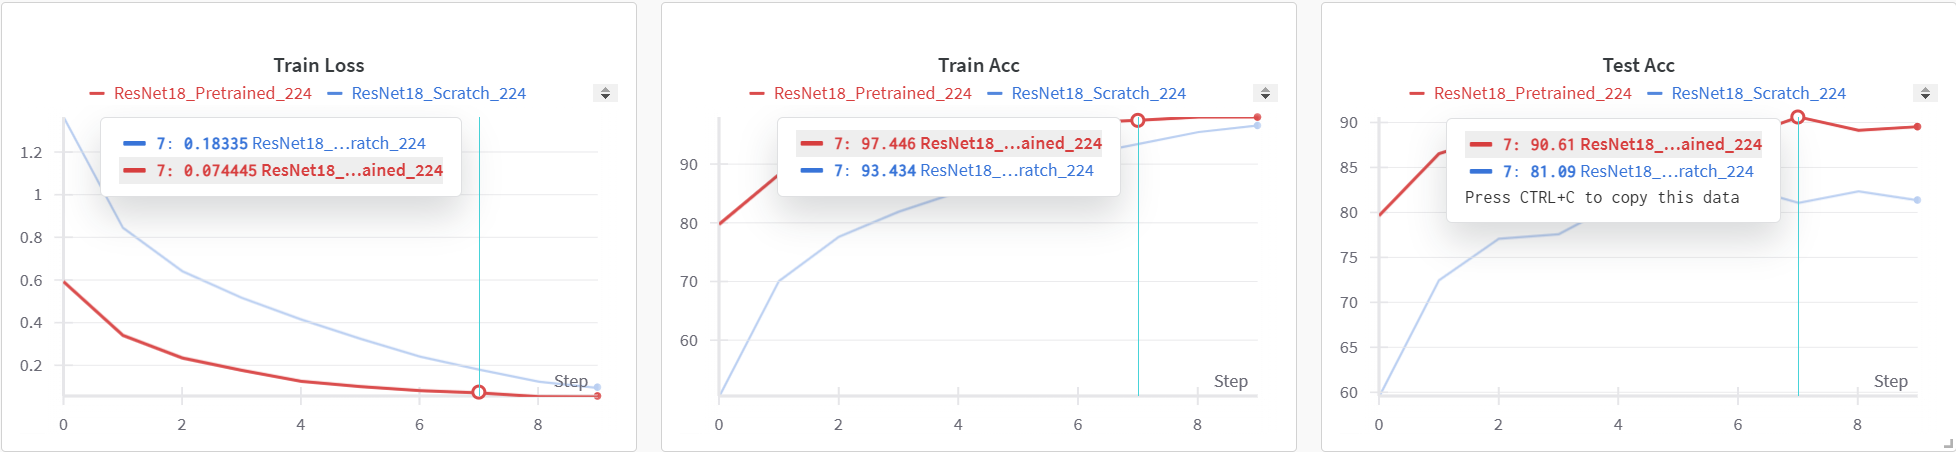

This concludes 1.2(Resized training)

In [35]:
def modify_resnet18(version):
    model = models.resnet18(pretrained=(version == "pretrained"))

    # ✅ New Mod 1: Depthwise Separable Convolution
    if version == "mod1":
        model.conv1 = nn.Sequential(
            nn.Conv2d(3, 3, kernel_size=3, stride=1, padding=1, groups=3, bias=False),  # Depthwise
            nn.Conv2d(3, 64, kernel_size=1, stride=1, bias=False)  # Pointwise
        )
        model.maxpool = nn.Identity()

    # ✅ New Mod 2: Increase Kernel Size (Not Channels)
    elif version == "mod2":
        model.conv1 = nn.Conv2d(3, 64, kernel_size=9, stride=1, padding=4, bias=False)  # Bigger receptive field
        model.maxpool = nn.Identity()  # Remove maxpool

    # ✅ Mod 3: Use stride instead of maxpool
    elif version == "mod3":
        model.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        model.maxpool = nn.Identity()

    # Adjust the final classification layer
    model.fc = nn.Linear(model.fc.in_features, num_classes)

    return model.to(device)



In [27]:
modifications = ["mod1", "mod2", "mod3"]
results = {}

for mod in modifications:
    print(f"🚀 Training ResNet18 ({mod}) from scratch...")

    model = modify_resnet18(version=mod)

    # Initialize WandB logging
    wandb.init(project="ResNet18_Modified", name=f"ResNet18_{mod}_Scratch")

    # Define loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    train_model(model, train_loader, test_loader, criterion, optimizer)

    # Store accuracy for comparison
    results[mod] = evaluate_model(model, test_loader)

    wandb.finish()

# Print final accuracy of all modifications
print("\n✅ Final Accuracy of Modified ResNet18:")
for mod, acc in results.items():
    print(f"{mod}: {acc:.2f}%")

🚀 Training ResNet18 (mod1) from scratch...


c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\logging\__init__.py", line 1113, in emit
    stream.write(msg + self.terminator)
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Epoch 1: Train Loss = 1.1694, Train Acc = 57.96%, Test Acc = 66.37%
Epoch 2: Train Loss = 0.7506, Train Acc = 73.77%, Test Acc = 72.43%
Epoch 3: Train Loss = 0.5758, Train Acc = 80.02%, Test Acc = 74.31%
Epoch 4: Train Loss = 0.4613, Train Acc = 83.99%, Test Acc = 81.32%
Epoch 5: Train Loss = 0.3538, Train Acc = 87.51%, Test Acc = 80.32%
Epoch 6: Train Loss = 0.2614, Train Acc = 90.78%, Test Acc = 82.28%
Epoch 7: Train Loss = 0.1946, Train Acc = 93.12%, Test Acc = 80.38%
Epoch 8: Train Loss = 0.1375, Train Acc = 95.10%, Test Acc = 81.06%
Epoch 9: Train Loss = 0.1081, Train Acc = 96.19%, Test Acc = 81.94%
Epoch 10: Train Loss = 0.0859, Train Acc = 96.95%, Test Acc = 81.48%
✅ Training Complete!


Test Acc,▁▄▄█▇█▇▇██
Train Acc,▁▄▅▆▆▇▇███
Train Loss,█▅▄▃▃▂▂▁▁▁
Test Acc,81.48
Train Acc,96.946
Train Loss,0.08593


🚀 Training ResNet18 (mod2) from scratch...


c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\logging\__init__.py", line 1113, in emit
    stream.write(msg + self.terminator)
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

RuntimeError: running_mean should contain 128 elements not 64

mod 1 accuracy is = 81.94%(best)

In [36]:
wandb.finish()

In [37]:
modifications = ["mod2", "mod3"]
results = {}

for mod in modifications:
    print(f"🚀 Training ResNet18 ({mod}) from scratch...")

    model = modify_resnet18(version=mod)

    # Initialize WandB logging
    wandb.init(project="ResNet18_Modified", name=f"ResNet18_{mod}_Scratch")

    # Define loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    train_model(model, train_loader, test_loader, criterion, optimizer)

    # Store accuracy for comparison
    results[mod] = evaluate_model(model, test_loader)

    wandb.finish()

# Print final accuracy of all modifications
print("\n✅ Final Accuracy of Modified ResNet18:")
for mod, acc in results.items():
    print(f"{mod}: {acc:.2f}%")

🚀 Training ResNet18 (mod2) from scratch...


c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\logging\__init__.py", line 1113, in emit
    stream.write(msg + self.terminator)
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Epoch 1: Train Loss = 1.4220, Train Acc = 48.37%, Test Acc = 57.44%
Epoch 2: Train Loss = 0.9160, Train Acc = 67.45%, Test Acc = 69.72%
Epoch 3: Train Loss = 0.6831, Train Acc = 76.26%, Test Acc = 68.99%
Epoch 4: Train Loss = 0.5322, Train Acc = 81.27%, Test Acc = 76.20%
Epoch 5: Train Loss = 0.4188, Train Acc = 85.29%, Test Acc = 80.19%
Epoch 6: Train Loss = 0.3223, Train Acc = 88.64%, Test Acc = 81.97%
Epoch 7: Train Loss = 0.2383, Train Acc = 91.49%, Test Acc = 82.07%
Epoch 8: Train Loss = 0.1687, Train Acc = 93.99%, Test Acc = 80.27%
Epoch 9: Train Loss = 0.1259, Train Acc = 95.46%, Test Acc = 82.20%
Epoch 10: Train Loss = 0.0918, Train Acc = 96.74%, Test Acc = 81.77%
✅ Training Complete!


Test Acc,▁▄▄▆▇██▇██
Train Acc,▁▄▅▆▆▇▇███
Train Loss,█▅▄▃▃▂▂▁▁▁
Test Acc,81.77
Train Acc,96.744
Train Loss,0.09176


🚀 Training ResNet18 (mod3) from scratch...


c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\logging\__init__.py", line 1113, in emit
    stream.write(msg + self.terminator)
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Epoch 1: Train Loss = 1.3486, Train Acc = 51.20%, Test Acc = 60.30%
Epoch 2: Train Loss = 0.8872, Train Acc = 68.70%, Test Acc = 68.85%
Epoch 3: Train Loss = 0.6768, Train Acc = 76.51%, Test Acc = 72.86%
Epoch 4: Train Loss = 0.5202, Train Acc = 82.05%, Test Acc = 76.32%
Epoch 5: Train Loss = 0.4020, Train Acc = 85.98%, Test Acc = 78.49%
Epoch 6: Train Loss = 0.2880, Train Acc = 89.87%, Test Acc = 75.71%
Epoch 7: Train Loss = 0.2081, Train Acc = 92.67%, Test Acc = 78.53%
Epoch 8: Train Loss = 0.1452, Train Acc = 94.90%, Test Acc = 77.13%
Epoch 9: Train Loss = 0.1214, Train Acc = 95.74%, Test Acc = 78.02%
Epoch 10: Train Loss = 0.0906, Train Acc = 96.84%, Test Acc = 78.12%
✅ Training Complete!


Test Acc,▁▄▆▇█▇█▇██
Train Acc,▁▄▅▆▆▇▇███
Train Loss,█▅▄▃▃▂▂▁▁▁
Test Acc,78.12
Train Acc,96.844
Train Loss,0.0906



✅ Final Accuracy of Modified ResNet18:
mod2: 81.77%
mod3: 78.12%


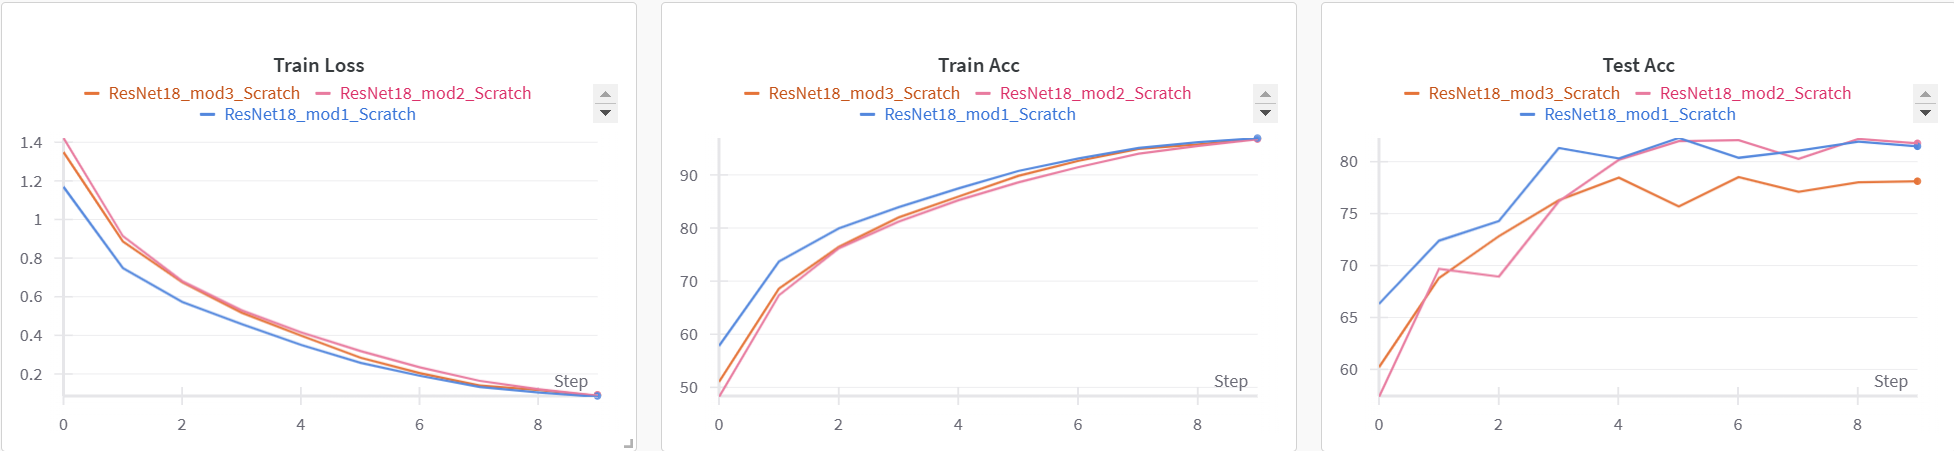

In [38]:
modifications = ["mod1", "mod2", "mod3"]
results_pretrained = {}

for mod in modifications:
    print(f"🚀 Training Pretrained ResNet18 ({mod})...")

    model = modify_resnet18(version=mod)

    # Freeze all layers except `conv1` and `fc`
    for name, param in model.named_parameters():
        if "conv1" not in name and "fc" not in name:
            param.requires_grad = False

    # Initialize WandB logging
    wandb.init(project="ResNet18_Modified", name=f"ResNet18_{mod}_Pretrained")

    # Define loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

    # Train model
    train_model(model, train_loader, test_loader, criterion, optimizer)

    # Store accuracy for comparison
    results_pretrained[mod] = evaluate_model(model, test_loader)

    wandb.finish()

# Print final accuracy of all pretrained modifications
print("\n✅ Final Accuracy of Modified Pretrained ResNet18:")
for mod, acc in results_pretrained.items():
    print(f"{mod}: {acc:.2f}%")

🚀 Training Pretrained ResNet18 (mod1)...


c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\logging\__init__.py", line 1113, in emit
    stream.write(msg + self.terminator)
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Epoch 1: Train Loss = 1.2288, Train Acc = 55.37%, Test Acc = 60.67%
Epoch 2: Train Loss = 0.7497, Train Acc = 73.46%, Test Acc = 71.89%
Epoch 3: Train Loss = 0.5220, Train Acc = 81.74%, Test Acc = 75.88%
Epoch 4: Train Loss = 0.3406, Train Acc = 88.36%, Test Acc = 76.86%
Epoch 5: Train Loss = 0.1994, Train Acc = 93.19%, Test Acc = 75.50%
Epoch 6: Train Loss = 0.1241, Train Acc = 95.81%, Test Acc = 76.07%
Epoch 7: Train Loss = 0.0961, Train Acc = 96.74%, Test Acc = 76.09%
Epoch 8: Train Loss = 0.0814, Train Acc = 97.17%, Test Acc = 76.03%
Epoch 9: Train Loss = 0.0697, Train Acc = 97.60%, Test Acc = 75.04%
Epoch 10: Train Loss = 0.0633, Train Acc = 97.83%, Test Acc = 77.99%
✅ Training Complete!


Test Acc,▁▆▇█▇▇▇▇▇█
Train Acc,▁▄▅▆▇█████
Train Loss,█▅▄▃▂▁▁▁▁▁
Test Acc,77.99
Train Acc,97.828
Train Loss,0.06333


🚀 Training Pretrained ResNet18 (mod2)...


c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\logging\__init__.py", line 1113, in emit
    stream.write(msg + self.terminator)
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Epoch 1: Train Loss = 1.3205, Train Acc = 52.21%, Test Acc = 48.63%
Epoch 2: Train Loss = 0.8665, Train Acc = 69.50%, Test Acc = 65.64%
Epoch 3: Train Loss = 0.6419, Train Acc = 77.55%, Test Acc = 71.75%
Epoch 4: Train Loss = 0.4577, Train Acc = 84.11%, Test Acc = 71.64%
Epoch 5: Train Loss = 0.3047, Train Acc = 89.50%, Test Acc = 74.72%
Epoch 6: Train Loss = 0.1801, Train Acc = 93.88%, Test Acc = 73.71%
Epoch 7: Train Loss = 0.1298, Train Acc = 95.46%, Test Acc = 74.54%
Epoch 8: Train Loss = 0.0989, Train Acc = 96.58%, Test Acc = 75.55%
Epoch 9: Train Loss = 0.0761, Train Acc = 97.41%, Test Acc = 72.90%
Epoch 10: Train Loss = 0.0806, Train Acc = 97.24%, Test Acc = 74.34%
✅ Training Complete!


Test Acc,▁▅▇▇████▇█
Train Acc,▁▄▅▆▇▇████
Train Loss,█▅▄▃▂▂▁▁▁▁
Test Acc,74.34
Train Acc,97.244
Train Loss,0.08059


🚀 Training Pretrained ResNet18 (mod3)...


c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\logging\__init__.py", line 1113, in emit
    stream.write(msg + self.terminator)
  File "c:\Users\SHARS\AppData\Local\Programs\Python\Python311\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Epoch 1: Train Loss = 1.3510, Train Acc = 51.06%, Test Acc = 57.60%
Epoch 2: Train Loss = 0.9443, Train Acc = 66.41%, Test Acc = 62.68%
Epoch 3: Train Loss = 0.7199, Train Acc = 74.68%, Test Acc = 68.37%
Epoch 4: Train Loss = 0.5320, Train Acc = 81.22%, Test Acc = 70.70%
Epoch 5: Train Loss = 0.3632, Train Acc = 87.21%, Test Acc = 71.49%
Epoch 6: Train Loss = 0.2414, Train Acc = 91.59%, Test Acc = 70.91%
Epoch 7: Train Loss = 0.1643, Train Acc = 94.19%, Test Acc = 70.12%
Epoch 8: Train Loss = 0.1302, Train Acc = 95.49%, Test Acc = 69.40%
Epoch 9: Train Loss = 0.1077, Train Acc = 96.21%, Test Acc = 69.69%
Epoch 10: Train Loss = 0.1016, Train Acc = 96.45%, Test Acc = 72.03%
✅ Training Complete!


Test Acc,▁▃▆▇█▇▇▇▇█
Train Acc,▁▃▅▆▇▇████
Train Loss,█▆▄▃▂▂▁▁▁▁
Test Acc,72.03
Train Acc,96.45
Train Loss,0.10157



✅ Final Accuracy of Modified Pretrained ResNet18:
mod1: 77.99%
mod2: 74.34%
mod3: 72.03%


to answer 1.3.4
Yes, reinitialising only conv1 affects the accuracy negatively , The network struggles to align the new low-level features with the high-level representations from pretrained layers. This is why accuracy dropped below 80% after modifications, instead of staying near 87% like the unmodified pretrained model.

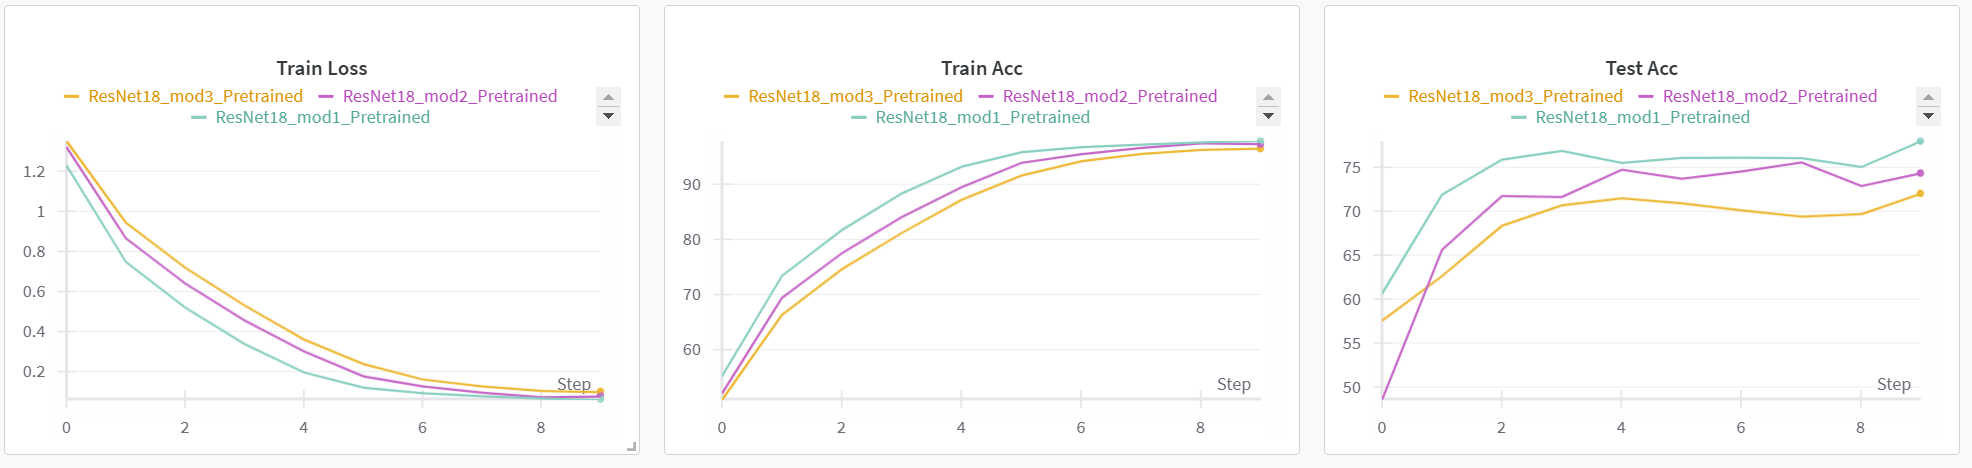

This concludes 1.3 section of modifying the Resnet-18 model 


In [42]:
# Load best scratch model
best_scratch_model = models.resnet18()
best_scratch_model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)  # Adjust for 36x36
best_scratch_model.maxpool = nn.Identity()  # Remove maxpool (not needed for small images)
best_scratch_model.fc = nn.Linear(best_scratch_model.fc.in_features, 10)  # Adjust output layer
best_scratch_model.load_state_dict(torch.load("best_model_scratch.pth"))
best_scratch_model.to(device).eval()

# Load best pretrained model
best_pretrained_model = models.resnet18(pretrained=True)
best_pretrained_model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)  # Adjust for 36x36
best_pretrained_model.maxpool = nn.Identity()  # Remove maxpool (not needed for small images)
best_pretrained_model.fc = nn.Linear(best_pretrained_model.fc.in_features, 10)
best_pretrained_model.load_state_dict(torch.load("best_model_pretrained.pth"))
best_pretrained_model.to(device).eval()

C:\Users\SHARS\AppData\Local\Temp\ipykernel_1256\234910934.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_scratch_model.load_state_dict(torch.load("best_model_scra

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): Identity()
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p

✅ F1 Score (Scratch Model): 0.8290
✅ F1 Score (Pretrained Model): 0.8822


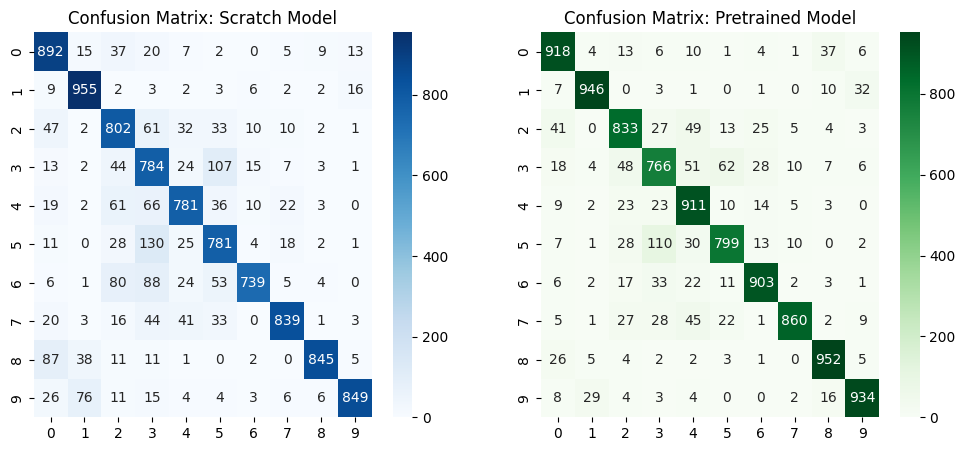

In [43]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_f1(model, dataloader):
    all_preds, all_labels = [], []
    
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute F1 Score
    f1 = f1_score(all_labels, all_preds, average="weighted")
    cm = confusion_matrix(all_labels, all_preds)
    
    return f1, cm

# Compute metrics for both models
f1_scratch, cm_scratch = evaluate_f1(best_scratch_model, test_loader)
f1_pretrained, cm_pretrained = evaluate_f1(best_pretrained_model, test_loader)

print(f"✅ F1 Score (Scratch Model): {f1_scratch:.4f}")
print(f"✅ F1 Score (Pretrained Model): {f1_pretrained:.4f}")

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_scratch, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix: Scratch Model")

sns.heatmap(cm_pretrained, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Confusion Matrix: Pretrained Model")

plt.show()

comparisions are as follows 

Resnet scartch (36x36) gets an accuracy of 82.67% and f1 score of 82.90


Resnet Pretrained (36x36) gets an accuracy of 88.22% and f1 score of 88.22


Resnet Scratch (224 x 224) gets an accuracy of 82.97% 


Resnet Pretrained (224x224) gets an accuracy of 90.61% 


Resnet Modified scratch gets best accuracy of 82.28% (mod1>mod2>mod3)


Resnet Modified pretrained gets best accuracy of 77.9%(mod1>mod2>mod3)

My observations are as folows 
Resnet Pretrained outperforms scratch by 6ish percent , same with the f1 scores , meaning that pretrained models classify more evenly across all the classes since they have been trained on a much larger, more generalisable dataset than the 50k images here.

For the 224x224 model the scratch model barely increases in accuracy (0.3ish%) but the increase is 2.4 percent for the pre_trained model since its been catered to/trained on 224x224 images.

As for the modified models , they are underperforming compared to our baseline model. meaning the modifications are disrupting the learning process
Mod-1Depthwise separable convolution doesnt change the efficacy of the training but only introduces lighter computation, (3x3 kernel used)
Mod-2 I change the kernel size to 9x9 instead of 7x7 to increase the receptive field , but it only causes a dip in accuracy since the images are 36x36 so not much to gain there by increasing the kernel size , 
Mod-3 I change the stride to 2 , which again reduces the accuracy since the filter is skipping out on even more crucial information that is already so little in our 36x36 image.


That would be it for this comparision and discussion